# Predicting heart disease using classification

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning moddel capable of predicting whether or not someone has heart disease based on their medical attributes.

Approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Probelm Definitoin

In a statemetnt,
> Given clinical paramaters about a patient, can I predict whether or not they have heart disease.

## 2.  Data

The orignal data came from Cleveland data from UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle.
## 3. Evaluation

> If I can reach 95% accuracy at predicting whether or not a patient has heart disease,
during the proof of concept, I'll pursue the project.

## 4. Features

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type:
    * 0: Typical angina: chest pain related decrease blood supplt to the heart
    * 1: Atypical angina: chest pain related to heart
    * 2: Non-anginal paint: typically esophagel spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm HG on admission to the hospital)
5. chol - serum cholestoral in mg/d1
6. fbs - (fasting blood sugar > 120 mg/d1) (1=true; 0 = false)
7. restecg - resting electrocardiographic result
8. thalachmaximum heart rate achieved
* exangexercise induced angina ( 1 = yes; 0 = no)
* oldpeakST depression induced by exercise relative to rest
* slopethe slope of the peak exercise ST segment
* canumber of major vessles(0-3) colored by floursopy
* thal3 = normal; 6 = fixed defect; 7= reverasble defect
* target( 1 = heart disease; 0 = no heart disease)

## The necessary tools

Data analysis and manipulation: pandas, Matplotlib and NumPy

In [101]:
# Import the tools

# Regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Sckit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [102]:
import pandas as pd

df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working wiht.


1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of the data?
    

In [103]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [105]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [106]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [107]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [108]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

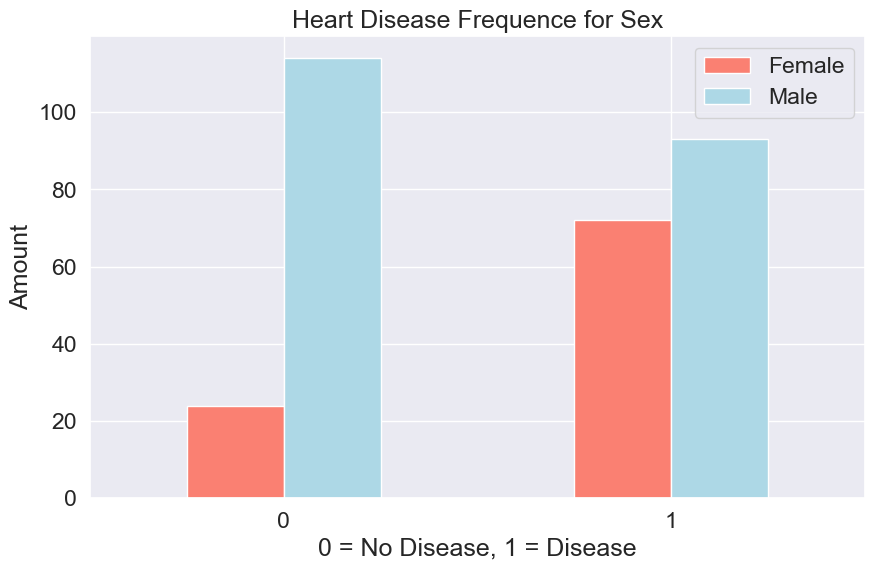

In [109]:
import matplotlib.pyplot as plt

# Create a plto of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequence for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [110]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

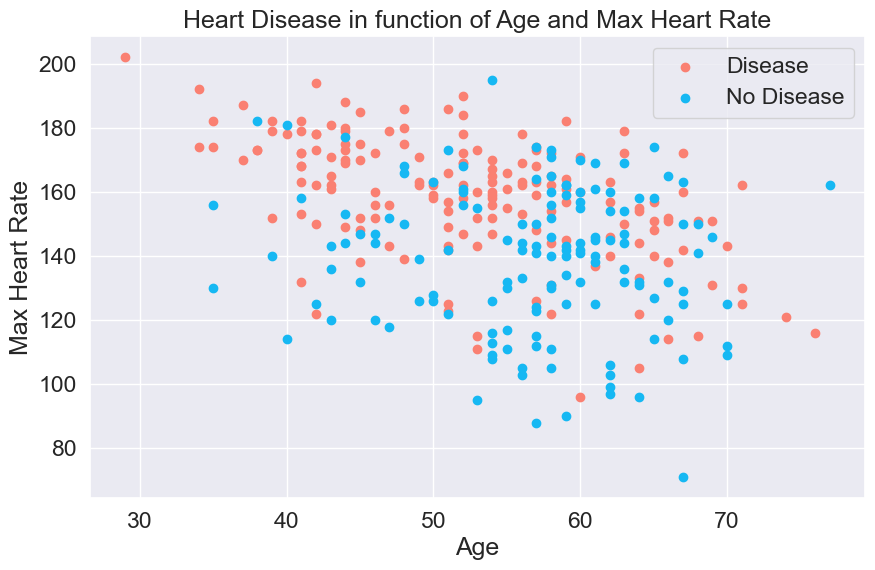

In [111]:
# Create another figure
plt.figure(figsize=(10, 6))

zimablue = (22 / 255, 184 / 255, 243 / 255)


# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon"
           );

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c=[zimablue],
           );

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

<Axes: ylabel='Frequency'>

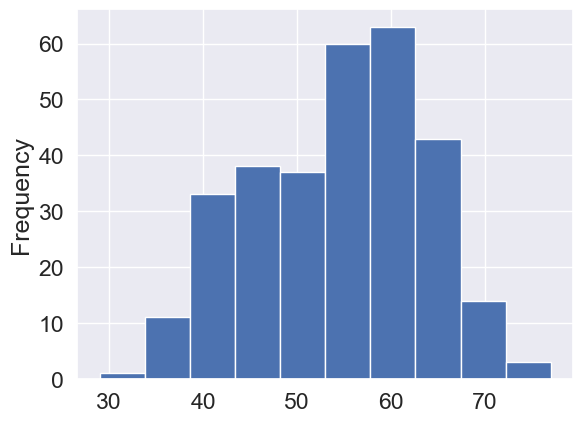

In [112]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()

In [113]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Heart Disease Frequency per Chat Pain Type

3. cp - chest pain type:
    * 0: Typical angina: chest pain related decrease blood supplt to the heart
    * 1: Atypical angina: chest pain related to heart
    * 2: Non-anginal paint: typically esophagel spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [114]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


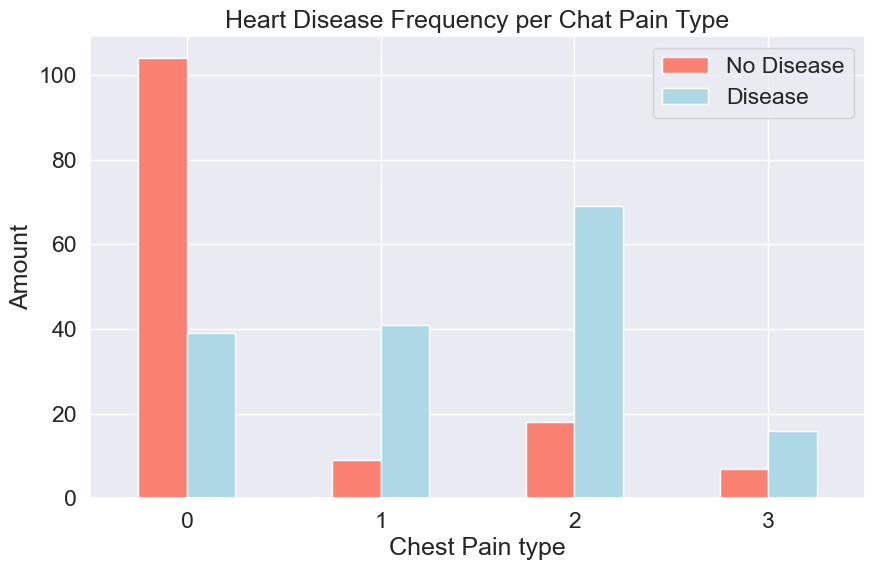

In [115]:
# Make the corsstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["salmon", "lightblue"])

plt.title ("Heart Disease Frequency per Chat Pain Type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [116]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, 0.0)

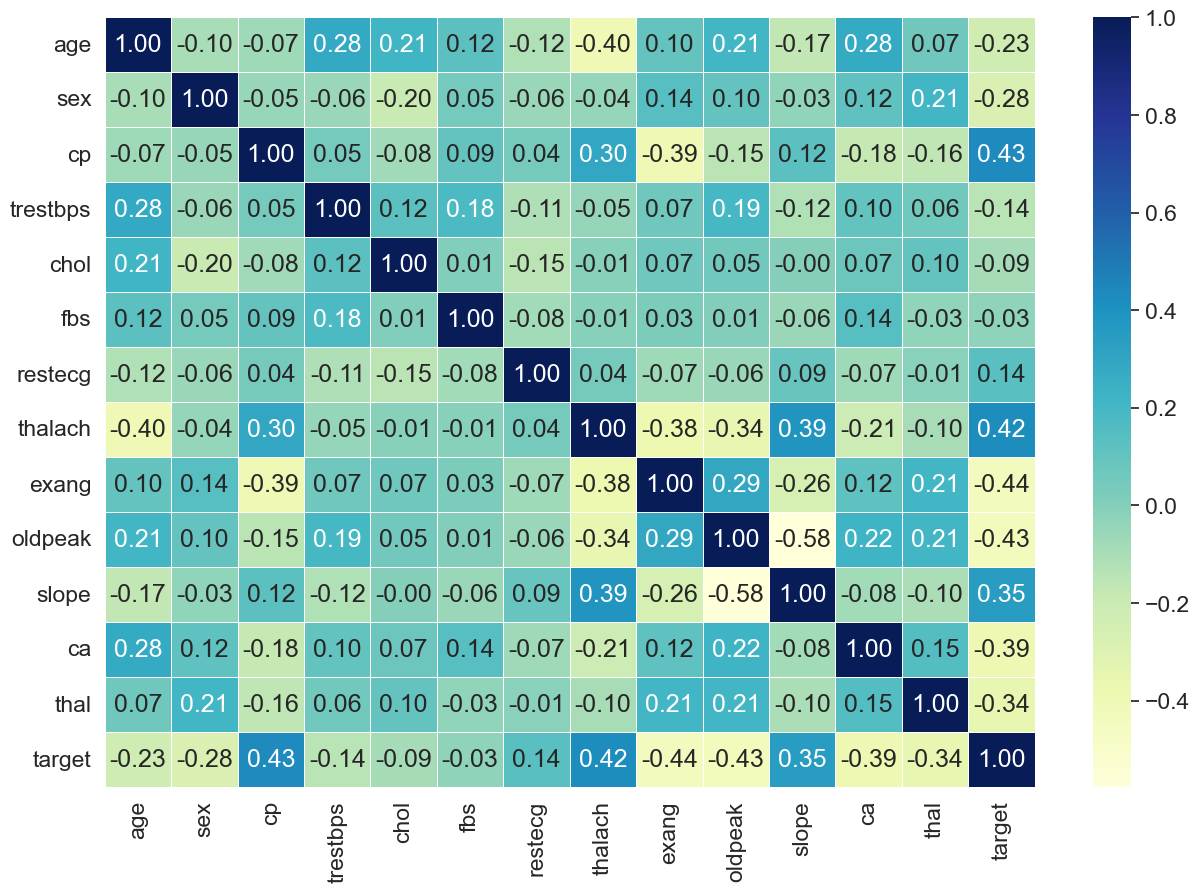

In [117]:
# Making correlation matrix understandable with heatmap
import seaborn as sns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

bottom, top = ax.get_ylim()
ax.set_ylim()

## 5. Modeling

In [118]:
X = df.drop("target", axis=1)

y = df["target"]

In [119]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [120]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [121]:
# Plit data into train and test set
import numpy as np


np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                           y,
                                           test_size=0.2)

In [122]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Training the model to find patterns on the training sets

Test it patters on the test set.

I'll try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [123]:
# Models from Sckit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Put models in a dictionary
models = {"Logisitc Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    
    np.random.seed(42)
    model_scores = {

    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [124]:
model_scores = fit_and_score(models, X_test=X_test,
                            X_train=X_train,
                            y_test=y_test,
                            y_train=y_train)
model_scores

C:\Users\aleks\.conda\envs\classify\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logisitc Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

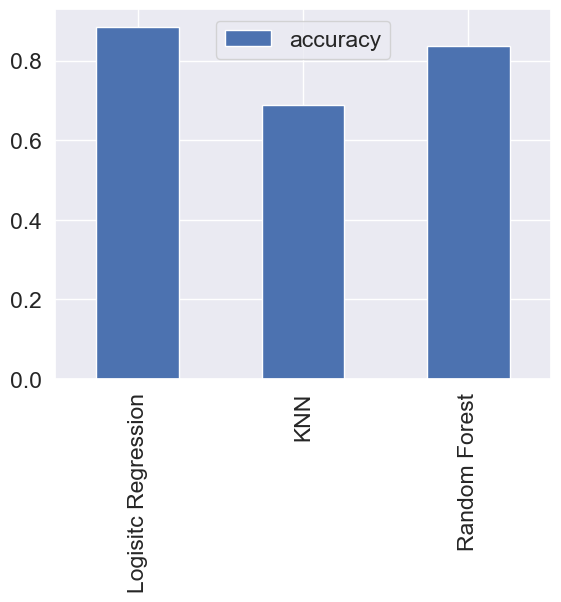

In [125]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

#### Looking into folowing:
    * Hyperparamater tuning
    * Feature importance
    * Confusion Matrix
    * Cross-validation
    * Precission
    * Recall
    * F1 score
    * Classification report
    * ROC curve
    * Area under the curve (AUC)

# Hyperparamater tuning

In [126]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [127]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [128]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41


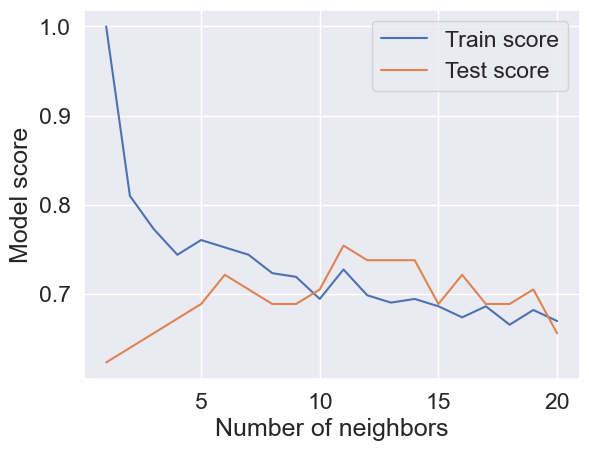

In [129]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}")

## Hyperparamater tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

.. using RandomizedSearchCV

In [130]:
# Create a hyperparamater grid for logisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparamater grid for RandomForestClassifer
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10], 
          "min_samples_split": np.arange(2, 20, 20),
          "min_samples_lead": np.arange(1, 20, 2)}

## Using the grid setups for each models with RandomizedSearchCV

In [131]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparamater search for LogisticRegression
rs_rf = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparamater search model for LogisticRegression
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [132]:
# Find the best hyperparamaters
rs_rf.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [133]:
# Evaluate the random search RandomForestClassifier() model
random_forest_evaluated = rs_rf.score(X_test, y_test)

In [134]:
random_forest_evaluated

0.8852459016393442

In [135]:
model_scores["Random Forest"]

0.8360655737704918

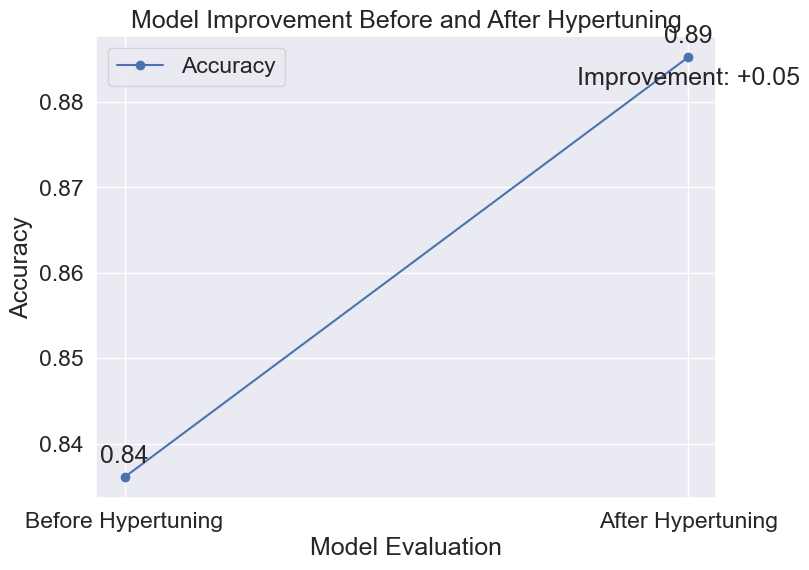

In [136]:
import matplotlib.pyplot as plt

improvement = random_forest_evaluated - model_scores["Random Forest"]

x_values = ["Before Hypertuning", "After Hypertuning"]

y_values = [model_scores["Random Forest"], random_forest_evaluated]

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label="Accuracy")
plt.title("Model Improvement Before and After Hypertuning")
plt.xlabel("Model Evaluation")
plt.ylabel("Accuracy")
plt.grid(True)

# Annotate the data points with accuracy values
for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
    
    # Annotate the improvement value
    if i == 1:  # Annotate only the "After Hypertuning" point
        plt.annotate(f"Improvement: +{improvement:.2f}", (x, y), textcoords="offset points", xytext=(0, -20), ha='center')

plt.legend()

# Show the plot
plt.show()

## Hyperparameter Tuning with GridSearchCV 

Using GridSearchCV for an 'Exhaustive search over specified parameter values for an estimator'

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [151]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hpyerparamater
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the grid to the model
gs_log_reg.fit(X_train, y_train);


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [152]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [153]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [154]:
model_scores["Logisitc Regression"]

0.8852459016393442

## Evaluating beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precission
* Recall
* F1-score

...and it would be great if cross-validation was used if possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [155]:
# Make predictions with the model
y_preds = gs_log_reg.predict(X_test)

In [156]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

## Import ROC curve  function from the sklearn.merics module

In [157]:
# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [158]:
from sklearn.metrics import plot_roc_curve

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test, ax=ax)

# Show the ROC curve
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\aleks\.conda\envs\classify\lib\site-packages\sklearn\metrics\__init__.py)

In [159]:
import sklearn
print(sklearn.__version__)

1.3.0


In [160]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

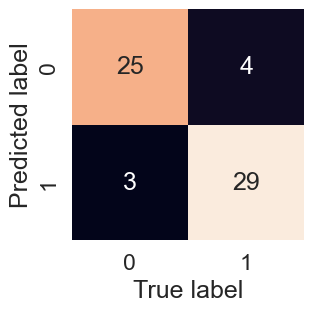

In [161]:
import seaborn as sns

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot thec confusion matrix
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                        annot=True,
                        cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [162]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using-cross validation

Using cross val score

In [164]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [167]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [182]:
# Cross-validated accuracy
y = df["target"]
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [185]:
#Cross-validated precission
cv_precission = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precission = np.mean(cv_precission)
cv_precission

0.8207936507936507

In [186]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [190]:
#Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_recall)
cv_f1

0.9212121212121213

<Axes: title={'center': 'Cross-validation classification metrics'}>

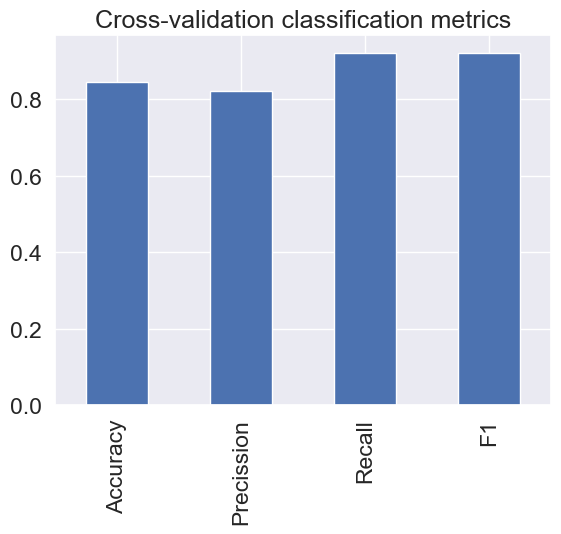

In [193]:
# Visualize cross-validation
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precission": cv_precission,
                          "Recall": cv_recall,
                          "F1": cv_f1,},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validation classification metrics",
                legend=False)